<a href="https://colab.research.google.com/github/BRIJNANDA1979/CNN-Sentinel/blob/master/CNN_model_for_21_classes_of_UC_Data_Read_and_Convert_tiff_to_jpeg_version_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://stackoverflow.com/questions/50207292/how-to-convert-geotiff-to-jpg-in-python-or-java
from osgeo import gdal
    
options_list = [
    '-ot Byte',
    '-of JPEG',
    '-b 1 2 3',
    '-scale'
]           

options_string = " ".join(options_list)
    
gdal.Translate(
    '/content/drive/MyDrive/Data/RGB.jpg',
    '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/RGB.tif',
    options=options_string
)


<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f0950e07150> >

In [ ]:
import os
from PIL import Image
os.chdir('/content/drive/MyDrive/Data')
path = os.getcwd()
print(path)
im = Image.open('/content/drive/MyDrive/Data/a.tiff')
im.convert("RGB").save('/content/drive/MyDrive/Data/out.jpeg', "JPEG", quality=100)

/content/drive/MyDrive/Data


In [ ]:
#https://stackoverflow.com/questions/37747021/create-numpy-array-of-images
resolution = 64

import glob
import numpy as np
from PIL import Image

X_data = []
files = glob.glob(r"/content/drive/MyDrive/Data/*.jpg")
for my_file in files:
    print(my_file)
    
    image = Image.open(my_file).convert('RGB')
    image = np.array(image)
    X_data.append(image)

print('X_data shape:', np.array(X_data).shape)

/content/drive/MyDrive/Data/RGB.jpg
X_data shape: (1, 120, 120, 3)


In [ ]:
import io
from PIL import Image
from PIL import ImageCms

def convert_to_srgb(img):
    '''Convert PIL image to sRGB color space (if possible)'''
    icc = img.info.get('icc_profile', '')
    if icc:
        io_handle = io.BytesIO(icc)     # virtual file
        src_profile = ImageCms.ImageCmsProfile(io_handle)
        dst_profile = ImageCms.createProfile('sRGB')
        img = ImageCms.profileToProfile(img, src_profile, dst_profile)
    return img

img = Image.open('/content/drive/MyDrive/Data/RGB.jpg')
img_conv = convert_to_srgb(img)
if img.info.get('icc_profile', '') != img_conv.info.get('icc_profile', ''):
    # ICC profile was changed -> save converted file
    img_conv.save('/content/drive/MyDrive/Data/RGB.jpg',
                  format = 'JPEG',
                  quality = 100,
                  icc_profile = img_conv.info.get('icc_profile',''))

In [ ]:
import cv2
import numpy as np

img = cv2.imread('/content/drive/MyDrive/Data/RGB.jpg')
res = cv2.resize(img, dsize=(64,64), interpolation=cv2.INTER_CUBIC)


In [2]:
!pip install rasterio

     |████████████████████████████████| 19.1MB 1.3MB/s 


/usr/local/lib/python3.7/dist-packages/rasterio/__init__.py:207: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


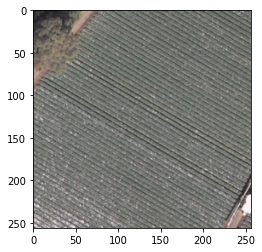

In [4]:
#21 classes 256x256 pixels
import rasterio
from rasterio.plot import show
img = r'/content/drive/MyDrive/UCMerced_LandUse/Images/agricultural/agricultural00.tif'
img = rasterio.open(fp)
show(img)

In [5]:
print(img.crs)

None


In [6]:
print(img.height, img.width)

256 256


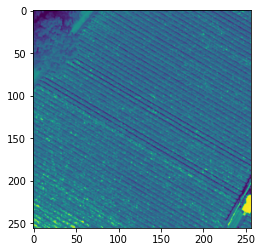

In [10]:
#for Reading particular band data of image
from osgeo import gdal
import matplotlib.pyplot as plt
image = gdal.Open('/content/drive/MyDrive/UCMerced_LandUse/Images/agricultural/agricultural00.tif', gdal.GA_ReadOnly) 
# Note GetRasterBand() takes band no. starting from 1 not 0
band = dataset.GetRasterBand(3)
arr = band.ReadAsArray()
plt.imshow(arr)

In [11]:
#number of bands
image.RasterCount

3

In [12]:
image.RasterXSize

256

In [13]:
image.RasterYSize

256

In [21]:
img = image.GetRasterBand(1)
img.GetStatistics(True,True) # shows min, max,mean, s.d.

[36.0, 237.0, 114.88051060268, 24.78537097933]

In [22]:
img = image.GetRasterBand(2)
img.GetStatistics(True,True) # shows min, max,mean, s.d.

[33.0, 235.0, 115.60825892857143, 24.252381576811]

In [23]:
img = image.GetRasterBand(3)
img.GetStatistics(True,True)# shows min, max,mean, s.d.

[35.0, 236.0, 110.79485212053571, 22.34820082432048]

## Reading tif files and learning through CNN

In [3]:
import os   
path = '/content/drive/MyDrive/UCMerced_LandUse/Images'
os.chdir(path)


In [4]:
x = os.listdir(path)
print(x)
print(len(x))

['harbor', 'river', 'mobilehomepark', 'golfcourse', 'agricultural', 'runway', 'buildings', 'forest', 'airplane', 'baseballdiamond', 'overpass', 'intersection', 'chaparral', 'sparseresidential', 'parkinglot', 'tenniscourt', 'mediumresidential', 'denseresidential', 'beach', 'freeway', 'storagetanks']
21


In [5]:
#for Reading particular band data of image
from osgeo import gdal
import matplotlib.pyplot as plt
import os
start_path = '.' # current directory
for path,dirs,files in os.walk(start_path):
    print(files)
    for filename in files:
        s = os.path.join(path,filename)
        


# Note GetRasterBand() takes band no. starting from 1 not 0


[]
['harbor01.tif', 'harbor02.tif', 'harbor03.tif', 'harbor04.tif', 'harbor05.tif', 'harbor06.tif', 'harbor07.tif', 'harbor08.tif', 'harbor09.tif', 'harbor10.tif', 'harbor11.tif', 'harbor12.tif', 'harbor13.tif', 'harbor14.tif', 'harbor15.tif', 'harbor16.tif', 'harbor17.tif', 'harbor18.tif', 'harbor19.tif', 'harbor20.tif', 'harbor21.tif', 'harbor22.tif', 'harbor23.tif', 'harbor24.tif', 'harbor25.tif', 'harbor26.tif', 'harbor00.tif', 'harbor27.tif', 'harbor28.tif', 'harbor29.tif', 'harbor30.tif', 'harbor31.tif', 'harbor32.tif', 'harbor33.tif', 'harbor34.tif', 'harbor35.tif', 'harbor36.tif', 'harbor37.tif', 'harbor38.tif', 'harbor39.tif', 'harbor40.tif', 'harbor41.tif', 'harbor42.tif', 'harbor43.tif', 'harbor44.tif', 'harbor45.tif', 'harbor46.tif', 'harbor47.tif', 'harbor48.tif', 'harbor49.tif', 'harbor50.tif', 'harbor51.tif', 'harbor52.tif', 'harbor53.tif', 'harbor54.tif', 'harbor55.tif', 'harbor56.tif', 'harbor57.tif', 'harbor58.tif', 'harbor59.tif', 'harbor60.tif', 'harbor61.tif', 'har

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import the needed packages
import tensorflow as tf
from keras import losses 
from keras import optimizers 
from keras import metrics 
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow.keras as keras
from keras.preprocessing import image
import numpy as np
from keras.models import model_from_json

import os   

path = '/content/drive/MyDrive/UCMerced_LandUse/Images'
os.chdir(path)
list_of_dir = os.listdir(path)



# define and move to dataset directory
datasetdir = path
import os
os.chdir(datasetdir)


  
# shortcut to the ImageDataGenerator class
ImageDataGenerator = keras.preprocessing.image.ImageDataGenerator
gen = ImageDataGenerator()
iterator = gen.flow_from_directory(
    os.getcwd(), 
    target_size=(256,256), 
    classes=('harbor', 'river', 'mobilehomepark', 'golfcourse', 'agricultural', 'runway', 'buildings', 'forest', 'airplane', 'baseballdiamond', 'overpass', 'intersection', 'chaparral', 'sparseresidential', 'parkinglot', 'tenniscourt', 'mediumresidential', 'denseresidential', 'beach', 'freeway', 'storagetanks')
)
# we can guess that the iterator has a next function, 
# because all python iterators have one. 
batch = iterator.next()
print(len(batch))
print(type(batch[0]))
print(batch[0].shape)
print(batch[0].dtype)
#print(batch[0].max())
#print(batch[1].shape)
#print(batch[1].dtype)
#print(type(batch[1]))
#the first element is an array of 32 images with 256x256 pixels, and 3 color channels, encoded as floats in the range 0 to 255
#The second element contains the 32 corresponding labels.


Found 2100 images belonging to 21 classes.
2
<class 'numpy.ndarray'>
(32, 256, 256, 3)
float32


In [7]:
batch = iterator.next()
print(len(batch))
print(type(batch[1]))
print(batch[1].shape)
print(batch[1].dtype)

2
<class 'numpy.ndarray'>
(32, 21)
float32


In [ ]:
#Augmentation by Flipping images
#Now, let's make the transformation a bit more complex. This time, the ImageDataGenerator will flip, zoom, and rotate the images on a random basis   
imgdatagen = ImageDataGenerator(
    rescale = 1/255., 
    horizontal_flip = True, 
    zoom_range = 0.3, 
    rotation_range = 15.,
    validation_split = 0.1,
)
batch_size = 30
height, width = (256,256)
train_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width), 
    classes=('harbor', 'river', 'mobilehomepark', 'golfcourse', 'agricultural', 'runway', 'buildings', 'forest', 'airplane', 'baseballdiamond', 'overpass', 'intersection', 'chaparral', 'sparseresidential', 'parkinglot', 'tenniscourt', 'mediumresidential', 'denseresidential', 'beach', 'freeway', 'storagetanks'),
    batch_size = batch_size,
    subset = 'training'
)

val_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width), 
    classes=('harbor', 'river', 'mobilehomepark', 'golfcourse', 'agricultural', 'runway', 'buildings', 'forest', 'airplane', 'baseballdiamond', 'overpass', 'intersection', 'chaparral', 'sparseresidential', 'parkinglot', 'tenniscourt', 'mediumresidential', 'denseresidential', 'beach', 'freeway', 'storagetanks'),
    batch_size = batch_size,
    subset = 'validation'
)
model = keras.models.Sequential()

initializers = {
    
}
model.add( 
    keras.layers.Conv2D(
        24, 5, input_shape=(256,256,3), 
        activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        48, 5, activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        96, 5, activation='relu', 
    )
)
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dropout(0.2) )

model.add( keras.layers.Dense(
    21, activation='softmax',
    )
)

model.summary()
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adamax(lr=0.001),
              metrics=['acc'])
model.fit_generator(
    train_dataset, 
    validation_data = val_dataset,
    workers=10,
    epochs=10,
)

# serialize model to JSON https://machinelearningmastery.com/save-load-keras-deep-learning-models/
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")


Found 1890 images belonging to 21 classes.
Found 210 images belonging to 21 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 24)      1824      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 24)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 48)      28848     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 57, 96)        115296    
_________________________________________________________________
flatten (Flatten)            (None, 311904)            0         
_____________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
26/63 [===========>..................] - ETA: 2:59 - loss: 0.2260 - acc: 0.0564